In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [2]:
class Data(Dataset):
    def __init__(self, train = True):
        super().__init__()
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = -3 * self.x + 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        
        if train:
            self.y[0] = 0
            self.y[50:55] = 20
        else:
            pass
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [3]:
torch.arange(-3, 3, 0.1)

tensor([-3.0000e+00, -2.9000e+00, -2.8000e+00, -2.7000e+00, -2.6000e+00,
        -2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -1.4901e-08,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8000e+00,  1.9000e+00,
         2.0000e+00,  2.1000e+00,  2.2000e+00,  2.3000e+00,  2.4000e+00,
         2.5000e+00,  2.6000e+00,  2.7000e+00,  2.8000e+00,  2.9000e+00])

In [4]:
train_data = Data()

val_data = Data(train=False)

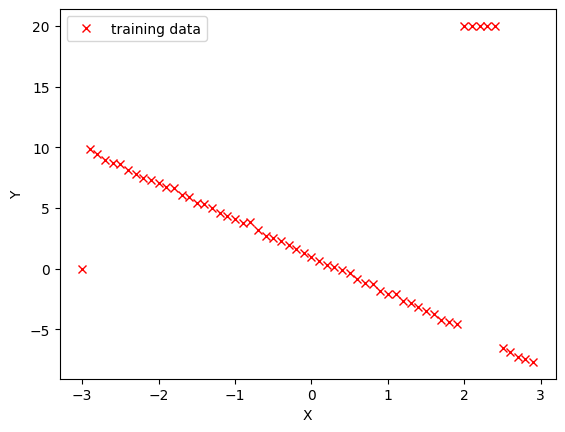

In [5]:
plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr', label='training data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [6]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [7]:
criterion = nn.MSELoss()
train_loader = DataLoader(train_data, batch_size=1)

In [8]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
# train_error = torch.zeros(4)
validation_error = torch.zeros(4)

MODELS = []

In [9]:
for i, lr in enumerate(learning_rates):
    model = LR(1, 1)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    for epoch in range(100):
        for x, y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
    print(f"learning_rate = {lr}")
    Yhat = model(val_data.x)
    val_loss = criterion(Yhat, val_data.y)
    validation_error[i] = val_loss.item()
    print(val_loss.item())
    print()
    
    MODELS.append(model)

learning_rate = 0.0001
10.594656944274902

learning_rate = 0.001
13.410812377929688

learning_rate = 0.01
10.229076385498047

learning_rate = 0.1
5.918202877044678



In [10]:
print(validation_error)

tensor([10.5947, 13.4108, 10.2291,  5.9182])


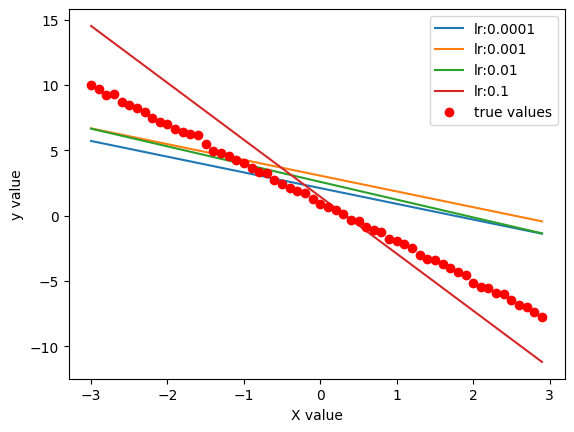

In [13]:
for model, lr in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label='lr:'+str(lr))
    
plt.plot(val_data.x.numpy(), val_data.y.numpy(), 'ro', label='true values')
plt.xlabel('X value')
plt.ylabel('y value')
plt.legend()